<a href="https://colab.research.google.com/github/Saulo-Ferraz/PythonCodes/blob/main/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import os
import gdown
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16, ResNet50
from keras import layers, models, optimizers
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
# Link de compartilhamento direto para o arquivo zip no Google Drive
zip_file_url = 'https://drive.google.com/uc?id=1syXLiu8GlZoyvSstb9tz_rBU3yBOp8Do'

# Caminho local para onde você deseja baixar o arquivo zip
zip_file_path = '/content/dataset.zip'

# Baixe o arquivo zip do Google Drive
gdown.download(zip_file_url, zip_file_path, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1syXLiu8GlZoyvSstb9tz_rBU3yBOp8Do
To: /content/dataset.zip
100%|██████████| 19.5M/19.5M [00:00<00:00, 84.5MB/s]


'/content/dataset.zip'

In [37]:
# Caminho para o diretório onde você deseja extrair as pastas
extracted_dir = '/content/dataset'

# Crie o diretório se não existir
os.makedirs(extracted_dir, exist_ok=True)

# Extrair o conteúdo do arquivo zip para o diretório de extração
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

# Lista os arquivos no diretório de extração
extracted_files = os.listdir(extracted_dir)
print("Arquivos extraídos:", extracted_files)

# Diretórios de treinamento e validação
train_dir = os.path.join(extracted_dir, "jellyfish")
validation_dir = os.path.join(extracted_dir, "jellyfish")

Arquivos extraídos: ['sharks', 'fishes', 'turtles', 'jellyfish']


In [38]:
train_dir = os.path.join(extracted_dir)
validation_dir = os.path.join(extracted_dir)

In [39]:
print(os.listdir(train_dir))
print(os.listdir(validation_dir))

['sharks', 'fishes', 'turtles', 'jellyfish']
['sharks', 'fishes', 'turtles', 'jellyfish']


In [ ]:
from PIL import Image

# Exemplo de verificação de imagem
img_path = "/content/dataset/jellyfish/jellyfish(1).jpeg"
try:
    img = Image.open(img_path)
    img.verify()
except (IOError, SyntaxError) as e:
    print(f"A imagem {img_path} está corrompida.")


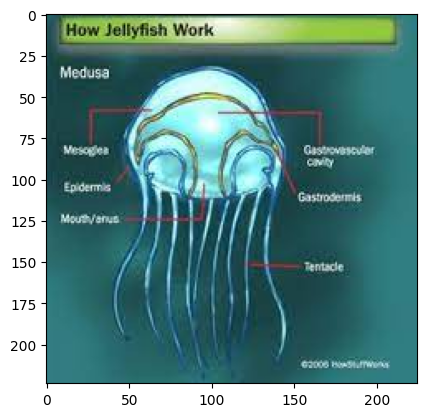

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Exemplo de exibição de imagens
img_path = "/content/dataset/jellyfish/jellyfish(222).jpeg"
img = mpimg.imread(img_path)
plt.imshow(img)
plt.show()


In [51]:
# Configurações
batch_size = 1000
img_size = (150, 250)  # Tamanho de imagem adequado para os modelos de transfer learning
num_classes = len(os.listdir(train_dir)) # Número de classes

# Data augmentation para os dados de treinamento
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data augmentation para os dados de validação
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Criação dos geradores de dados de treinamento e validação
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 2189 images belonging to 4 classes.
Found 2189 images belonging to 4 classes.


In [ ]:
# Modelo 1: CNN personalizada
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(num_classes, activation='softmax'))

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 248, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 124, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 122, 64)       18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 36, 61, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 59, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 17, 29, 128)      

In [43]:
# Modelo 2: CNN personalizada com hiperparâmetros diferentes
model2 = models.Sequential()
model2.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(256, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(num_classes, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 148, 248, 64)      1792      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 74, 124, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 72, 122, 128)      73856     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 36, 61, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 34, 59, 256)       295168    
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 17, 29, 256)      

In [ ]:
# Modelo de Transfer Learning 1: VGG16
base_model1 = VGG16(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))
model_tl1 = models.Sequential()
model_tl1.add(base_model1)
model_tl1.add(layers.Flatten())
model_tl1.add(layers.Dense(512, activation='relu'))
model_tl1.add(layers.Dense(num_classes, activation='softmax'))

# Congelar as camadas do modelo base (VGG16)
for layer in base_model1.layers:
    layer.trainable = False

model_tl1.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-4), metrics=['accuracy'])

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
model_tl1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 14336)             0         
                                                                 
 dense_4 (Dense)             (None, 512)               7340544   
                                                                 
 dense_5 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 22057284 (84.14 MB)
Trainable params: 7342596 (28.01 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
# Modelo de Transfer Learning 2: ResNet50
base_model2 = ResNet50(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))
model_tl2 = models.Sequential()
model_tl2.add(base_model2)
model_tl2.add(layers.Flatten())
model_tl2.add(layers.Dense(512, activation='relu'))
model_tl2.add(layers.Dense(num_classes, activation='softmax'))

# Congelar as camadas do modelo base (ResNet50)
for layer in base_model2.layers:
    layer.trainable = False

model_tl2.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-4), metrics=['accuracy'])

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
model_tl2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 8, 2048)        23587712  
                                                                 
 flatten_3 (Flatten)         (None, 81920)             0         
                                                                 
 dense_6 (Dense)             (None, 512)               41943552  
                                                                 
 dense_7 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 65533316 (249.99 MB)
Trainable params: 41945604 (160.01 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [48]:
epochs = 1  # Defina o número de épocas desejado
history1 = model1.fit(train_generator, epochs=epochs, validation_data=validation_generator)

score1 = model1.evaluate(validation_generator)
print("Acurácia Modelo 1:", score1[1])

def evaluate_model(model, generator):
    y_true = generator.classes
    y_pred = np.argmax(model.predict(generator), axis=1)

    print("\nMatriz de Confusão:")
    print(confusion_matrix(y_true, y_pred))

    print("\nRelatório de Classificação:")
    print(classification_report(y_true, y_pred, target_names=generator.class_indices.keys()))

evaluate_model(model1, validation_generator)

5/5 [==============================] - 4s 701ms/step - loss: 1.1506 - accuracy: 0.4874
Acurácia Modelo 1: 0.4874371886253357
5/5 [==============================] - 4s 809ms/step

Matriz de Confusão:
[[208 129  72 123]
 [ 48 321 126  37]
 [ 24  45 396  81]
 [ 96  42 299 142]]

Relatório de Classificação:
              precision    recall  f1-score   support

      fishes       0.55      0.39      0.46       532
   jellyfish       0.60      0.60      0.60       532
      sharks       0.44      0.73      0.55       546
     turtles       0.37      0.25      0.30       579

    accuracy                           0.49      2189
   macro avg       0.49      0.49      0.48      2189
weighted avg       0.49      0.49      0.47      2189



In [52]:
epochs = 1  # Defina o número de épocas desejado
history2 = model2.fit(train_generator, epochs=epochs, validation_data=validation_generator)

score2 = model2.evaluate(validation_generator)
print("Acurácia Modelo 2:", score2[1])

def evaluate_model(model, generator):
    y_true = generator.classes
    y_pred = np.argmax(model.predict(generator), axis=1)

    print("\nMatriz de Confusão:")
    print(confusion_matrix(y_true, y_pred))

    print("\nRelatório de Classificação:")
    print(classification_report(y_true, y_pred, target_names=generator.class_indices.keys()))

evaluate_model(model2, validation_generator)

ResourceExhaustedError: ignored

In [50]:
history_tl1 = model_tl1.fit(train_generator, epochs=epochs, validation_data=validation_generator)
score_tl1 = model_tl1.evaluate(validation_generator)
print("Acurácia Transfer Learning 1:", score_tl1[1])
evaluate_model(model_tl1, validation_generator)

ResourceExhaustedError: ignored

In [ ]:
# Treinamento dos modelos
epochs = 1  # Defina o número de épocas desejado
history1 = model1.fit(train_generator, epochs=epochs, validation_data=validation_generator)
history2 = model2.fit(train_generator, epochs=epochs, validation_data=validation_generator)
history_tl1 = model_tl1.fit(train_generator, epochs=epochs, validation_data=validation_generator)
history_tl2 = model_tl2.fit(train_generator, epochs=epochs, validation_data=validation_generator)

# Avaliação dos modelos
score1 = model1.evaluate(validation_generator)
score2 = model2.evaluate(validation_generator)
score_tl1 = model_tl1.evaluate(validation_generator)
score_tl2 = model_tl2.evaluate(validation_generator)

print("Acurácia Modelo 1:", score1[1])
print("Acurácia Modelo 2:", score2[1])
print("Acurácia Transfer Learning 1:", score_tl1[1])
print("Acurácia Transfer Learning 2:", score_tl2[1])

# Predições em um conjunto de validação
def evaluate_model(model, generator):
    y_true = generator.classes
    y_pred = np.argmax(model.predict(generator), axis=1)

    print("\nMatriz de Confusão:")
    print(confusion_matrix(y_true, y_pred))

    print("\nRelatório de Classificação:")
    print(classification_report(y_true, y_pred, target_names=generator.class_indices.keys()))

# Avaliação da CNN personalizada (Modelo 1)
evaluate_model(model1, validation_generator)

# Avaliação da CNN personalizada com hiperparâmetros diferentes (Modelo 2)
evaluate_model(model2, validation_generator)

# Avaliação do Modelo de Transfer Learning 1 (VGG16)
evaluate_model(model_tl1, validation_generator)

# Avaliação do Modelo de Transfer Learning 2 (ResNet50)
evaluate_model(model_tl2, validation_generator)


5/5 [==============================] - 295s 57s/step - loss: 4.3414 - accuracy: 0.2841 - val_loss: 1.6692 - val_accuracy: 0.2421
